In [10]:
#Step 1
#Install PyTorch library (torch)  if not already available:
!pip install torch torchvision


In [2]:
#Step 2
#Import the required libraries:
import torch    #For creating and managing the neural network.
import torch.nn as nn  #For defining the structure of the neural network.
import torch.optim as optim #For optimization
import torchvision #For working with standard datasets like MNIST
import torchvision.transforms as transforms  #for image preprocessing: Resizing, cropping, normalization and converting to tensors
import matplotlib.pyplot as plt #For data visualization



In [11]:
#Step 3: Prepare the Dataset
#Use a dataset like MNIST or CIFAR-10:
# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [12]:
#Step 4: Define the Neural Network
#Create a simple feedforward neural network:

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input to hidden
        self.fc2 = nn.Linear(128, 64)      # Hidden to hidden
        self.fc3 = nn.Linear(64, 10)       # Hidden to output
        self.relu = nn.ReLU()     # Define the Relu Activation function, stands for Rectified Linear Unit, i.e.; max(0, x)
        self.softmax = nn.LogSoftmax(dim=1)  # For classification, Output probabilities

    def forward(self, x): # how the input data flows through the layers of the model to produce the output.
        x = x.view(-1, 28 * 28)  #Flatten input, reshapes x into a 2D tensor with shape beacuse layer in NN expect a 2D input
        x = self.relu(self.fc1(x)) # Pass through the first layer and apply ReLU
        x = self.relu(self.fc2(x)) #Pass through the second layer and apply ReLU
        x = self.softmax(self.fc3(x)) # Pass through the third layer and apply Softmax
        return x


In [13]:
#Step 5: Define the Loss Function and Optimizer
model = SimpleNN()
criterion = nn.NLLLoss()  # Negative Log-Likelihood Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [14]:
#Step 6: Train the Model
epochs = 3 #If you say the model should train for 3 epochs,
            #it will go through the training data 3 times to learn and adjust itself each time.

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/3, Loss: 0.0024714421615925934
Epoch 1/3, Loss: 0.004919684772044103
Epoch 1/3, Loss: 0.007338130652014889
Epoch 1/3, Loss: 0.009740327467033858
Epoch 1/3, Loss: 0.01206023072891398
Epoch 1/3, Loss: 0.014409517428514037
Epoch 1/3, Loss: 0.01669030174263505
Epoch 1/3, Loss: 0.018932688210818813
Epoch 1/3, Loss: 0.02109622040282943
Epoch 1/3, Loss: 0.023257577597205318
Epoch 1/3, Loss: 0.025405894718698856
Epoch 1/3, Loss: 0.027537571977196473
Epoch 1/3, Loss: 0.02958101275633139
Epoch 1/3, Loss: 0.03150899565296132
Epoch 1/3, Loss: 0.033425303029099
Epoch 1/3, Loss: 0.03525663133877427
Epoch 1/3, Loss: 0.03714203160963079
Epoch 1/3, Loss: 0.03888739820228203
Epoch 1/3, Loss: 0.04055344334035032
Epoch 1/3, Loss: 0.042244910050048504
Epoch 1/3, Loss: 0.044006707952983344
Epoch 1/3, Loss: 0.04561915085005608
Epoch 1/3, Loss: 0.04712966446683351
Epoch 1/3, Loss: 0.04849715286226415
Epoch 1/3, Loss: 0.04984744970224051
Epoch 1/3, Loss: 0.05141480124072988
Epoch 1/3, Loss: 0.052632936

In [15]:
#Step 7: Test the Model
#Evaluate the model's accuracy on the test set:

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


Accuracy: 96.12%


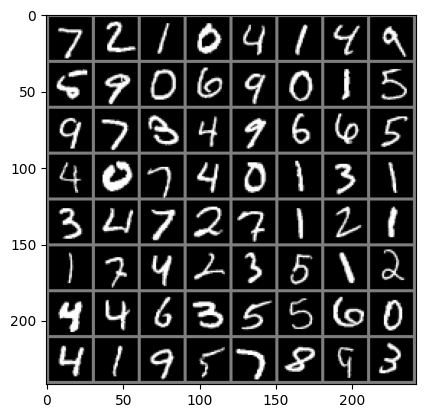

Predicted:  7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8


In [16]:
#Step 8: Visualize Results (Optional)
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Denormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Predict
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images and predictions
imshow(torchvision.utils.make_grid(images))
print("Predicted: ", ' '.join(f'{predicted[j].item()}' for j in range(62)))


In [9]:
#Step 11 Save the Model: Save and reload trained models for future use
torch.save(model.state_dict(), 'model.pth')
model.load_state_dict(torch.load('model.pth'))


Predicted:  7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8


<ipython-input-9-02b477340462>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>